In [5]:
# demagr demind demdom rivout
# km3/year = 1/1e9 m3/year
losangels = [0.0485810622, 0.86456747655, 0.389359802475, 0.311023613025]
tokyo = [1.5673424687085937, 0.4176988168078125, 0.6899961425625001, 7.8013412226]
london = [0.0, 0.0965463701203125, 0.142805381653125, 1.611607104]
paris = [0.09582461262509766, 0.34954634885625, 0.140136756665625, 8.5725547776]

summary = [paris, london, tokyo, losangels]
name = ['paris', 'london', 'tokyo', 'losangels']

In [6]:
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

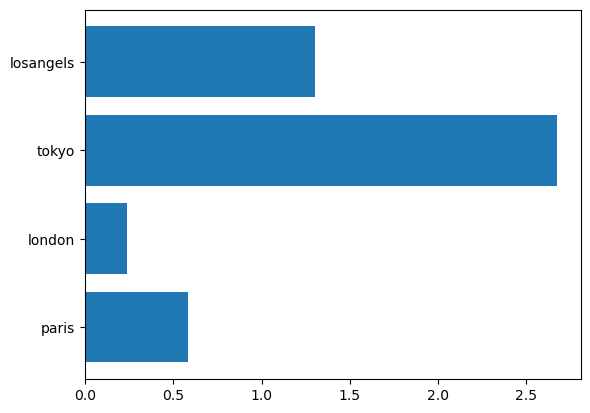

In [7]:
value = [np.sum(country[0:3]) for country in summary]
plt.barh(name, value)

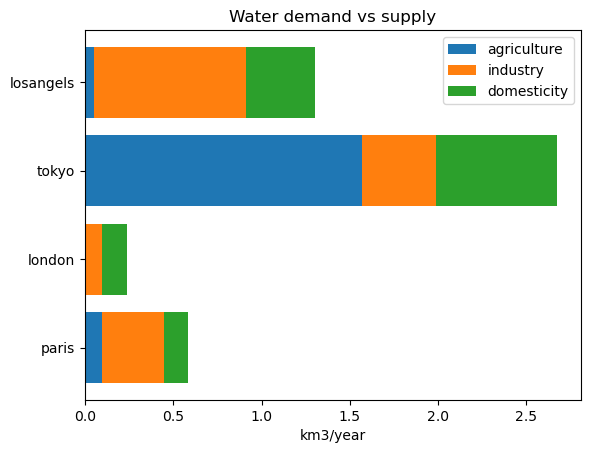

In [14]:
agr = np.array([country[0] for country in summary])
ind = np.array([country[1] for country in summary])
dom = np.array([country[2] for country in summary])

plt.barh(name, agr, label='agriculture')
plt.barh(name, ind, left=agr, label='industry')
plt.barh(name, dom, left=agr+ind, label='domesticity')

plt.title('Water demand vs supply')
plt.xlabel('km3/year')

plt.legend()

<BarContainer object of 4 artists>

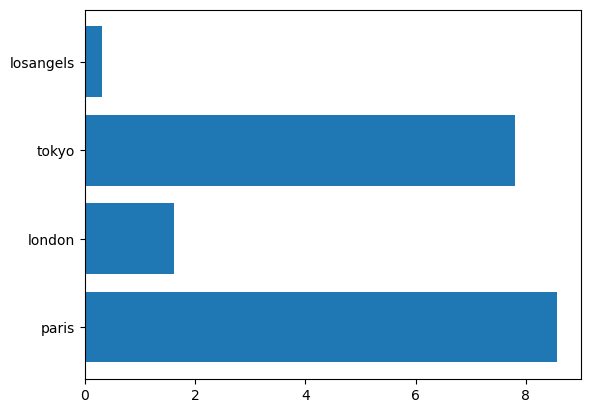

In [16]:
rivout = np.array([country[3] for country in summary])

plt.barh(name, rivout, label='river supply')

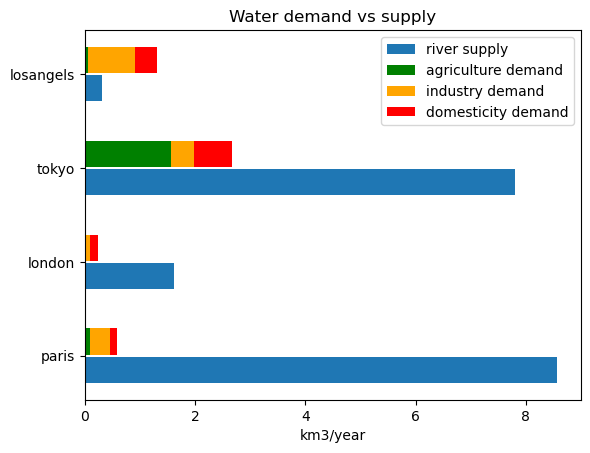

In [43]:
fig, ax = plt.subplots()

x = np.arange(len(name))
y = np.arange(4)
gap = 0.15
width=0.28

ax.barh(x-gap, rivout, width, label='river supply')

ax.barh(x+gap, agr, width, label='agriculture demand', color='green')
ax.barh(x+gap, ind, width, left=agr, label='industry demand', color='orange')
ax.barh(x+gap, dom, width, left=agr+ind, label='domesticity demand', color='red')

ax.set_title('Water demand vs supply')
ax.set_xlabel('km3/year')
ax.set_yticks(y)
ax.set_yticklabels(name)
         

ax.legend()